<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall2023/blob/main/Module%208/Final_Part_2_Fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# II. Causality in materials science

II.1. Explain the concept of causality and its significance in understanding material properties and behaviors.

Answer:

II.2. Describe what a confounder is and give an example of a potential confounder in an experiment involving the study of corrosion resistance in alloys.

Answer:

II.3. Identify a causal chain in the process of polymer degradation and point out any potential confounders that could affect the results.

Answer:

II.4. Provide an example from materials science where a correlation between two variables does not imply causation, explaining the role of potential confounders.

Answer:

II.5. Discuss how grain size and impurity levels can act as confounders in the analysis of a metal’s mechanical properties.

Answer:

II.6. How might temperature influence the electrical conductivity of a material, and what are potential confounders in this relationship?

Answer:

II.7. Explain what collider bias is and provide an example of how it might occur in materials science research.

Answer:

II.8. Discuss how colliders can lead to incorrect interpretations in studies related to material fatigue and lifespan.

Answer:

II.9. Describe challenges in establishing causality in machine learning models used in materials science and the importance of identifying confounders and colliders.

Answer:

II.10. How would you design an experiment to reveal the causal relationship between processing conditions and the final microstructure of a ceramic material, considering potential confounders and colliders?

Answer:

# III. Analysis of atomic images

Based on the notebooks by Maxim Ziatdinov, ziatdinovmax@gmail.com

In [1]:
!pip install git+https://github.com/pycroscopy/atomai # install the latest version from source

  Cloning https://github.com/pycroscopy/atomai to /tmp/pip-req-build-hkgt45yz
  Running command git clone --filter=blob:none --quiet https://github.com/pycroscopy/atomai /tmp/pip-req-build-hkgt45yz
  Resolved https://github.com/pycroscopy/atomai to commit e884ba50a8bf1cb23b63fe6286eaafc0ff3c4d2b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.6/175.6 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00
  Created wheel for atomai: filename=atomai-0.7.9-py3-none-any.whl size=162662 sha256=cf6a3da10c8d73256df3d219a869a69a628ea97f810476abf54a44e69630becd
  Stored in directory: /tmp/pip-ephem-wheel-cache-7twkd2bf/wheels/ca/13/12/fc0f90d0fce48063154d2a5f9fc755aee641d61d21f58f1800
  Created wheel fo

Imports:

In [2]:
import atomai as aoi
import numpy as np
import matplotlib.pyplot as plt

Download training/test data:

In [3]:
# !wget -O "Hex_train_test3.npz" https://www.dropbox.com/s/aldxrawcf88btkc/Hex_train_test3.npz?dl=0

In [4]:
download_link1 = 'https://drive.google.com/uc?id=1-4-IQ71m--OelQb1891GnbG1Ako1-DKh'
download_link2 = 'https://drive.google.com/uc?id=18JK9GcMPMWHmHtwArujVQRLr6N4VIM_j'

!gdown -q $download_link1 -O 'training_data.npy'
!gdown -q $download_link2 -O 'validation_data.npy'

# Load train/test data (this is a simple dataset generated just from a single image)
dataset = np.load('training_data.npy')
images = dataset['X_train']
labels = dataset['y_train']
images_test = dataset['X_test']
labels_test = dataset['y_test']

# Load validation data (data from different experiment)
expdata = np.load("validation_data.npy")


In [5]:
!gdown --fuzzy https://drive.google.com/file/d/14CGHXHfca4FsQjzVCOPkE6IpokE9fwC-/view?usp=sharing # bto_atomic.jpg

Downloading...
From: https://drive.google.com/uc?id=14CGHXHfca4FsQjzVCOPkE6IpokE9fwC-
To: /content/bto_atomic.jpg
100% 221k/221k [00:00<00:00, 119MB/s]


In [6]:
'''
# Load train/test data (this is a simple dataset generated just from a single image)
dataset = np.load("Hex_train_test3.npz")
images = dataset["X_train"]
labels = dataset["y_train"]
images_test = dataset["X_test"]
labels_test = dataset["y_test"]
'''

'\n# Load train/test data (this is a simple dataset generated just from a single image)\ndataset = np.load("Hex_train_test3.npz")\nimages = dataset["X_train"]\nlabels = dataset["y_train"]\nimages_test = dataset["X_test"]\nlabels_test = dataset["y_test"]\n'

In [7]:
print(images.shape, labels.shape)
print(images_test.shape, labels_test.shape)

(1656, 1, 256, 256) (1656, 256, 256)
(414, 1, 256, 256) (414, 256, 256)


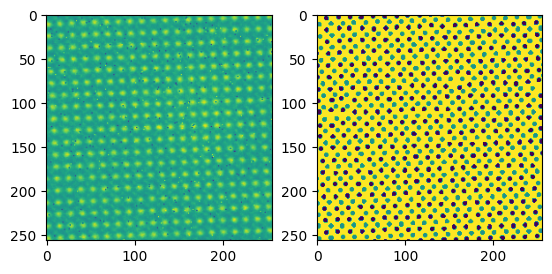

In [8]:
n = 15

fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[n,0,:,:])
ax[1].imshow(labels[n,:,:])
plt.show()

## Problem III.1

III.1. Create a data set of images and labels by slicing the original training set. For example, you can simply select 64x64 window from both images, labels, images_test and labels_test data sets. Make sure to use different name, so that we keep original data sets for later.

III.2. Create a neural network that learns to segment the 64x64 images, meaning to predict labels based on inputs.

III.3. Train the network and explore the training/validation curve.

Now, let's download experimental image.

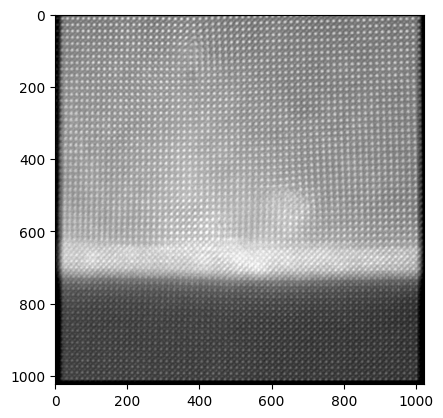

In [9]:
# Load validation data (data from different experiment)
expdata = plt.imread('bto_atomic.jpg')
plt.imshow(expdata, cmap='gray')

III.4. Now, select the segment of the image (experiment with resizing and slicing) and see if your network can find atoms on this image.

Now, let's compare the results with the "official" AtomAI solution.

Note that the training/test images and masks represent 4 separate numpy arrays with the dimensions (n_images, n_channels=1, image_height, image_width) for training/test images, and (n_images, image_height, image_width) for the associated masks (aka ground truth). The reason that our images have 4 dimensions, while our labels have only 3 dimensions is because of how the cross-entropy loss is calculated in PyTorch (see [here](https://pytorch.org/docs/stable/nn.html#nllloss)). Briefly, if you have multiple channels corresponding to different classes in your labeled data, you'll need to map your target classes to tensor indices. Here, we already did this for our training and test data during the preparation stage and so everything is ready for training.

Let's plot some of the original training data:

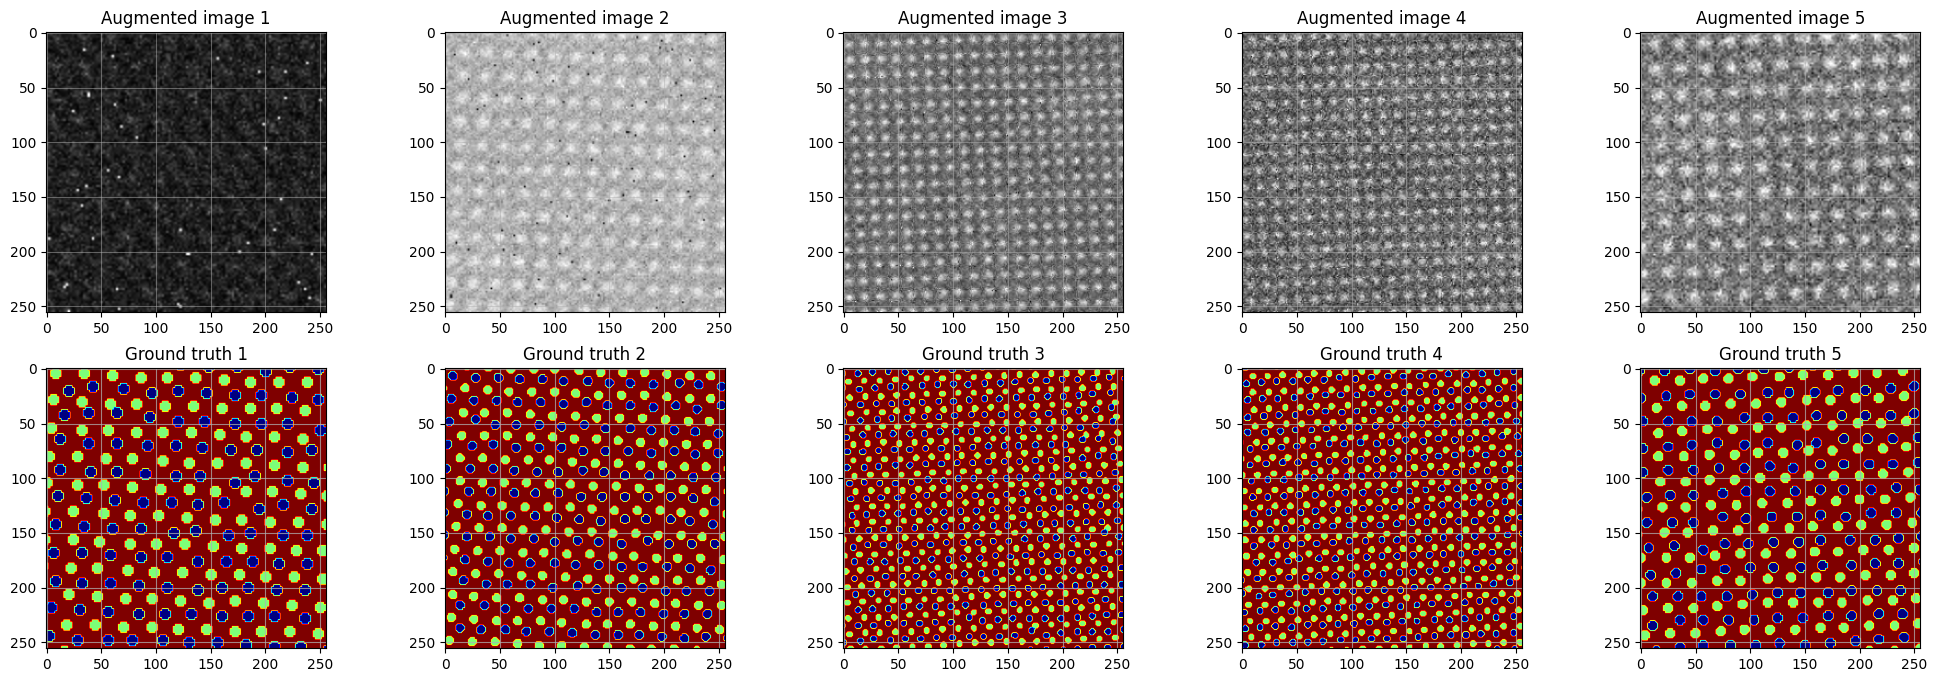

In [10]:
n = 5 # number of images to plot

n = n + 1
fig = plt.figure( figsize=(30, 8))
for i in range(1, n):
    ax = fig.add_subplot(2, n, i)
    ax.imshow(images[i-1,0,:,:], cmap='gray')
    ax.set_title('Augmented image ' + str(i))
    ax.grid(alpha = 0.5)
    ax = fig.add_subplot(2, n, i+n)
    ax.imshow(labels[i-1], interpolation='Gaussian', cmap='jet')
    ax.set_title('Ground truth ' + str(i))
    ax.grid(alpha=0.75)

The neural network will be trained to take the images in the top row (see plot above) as the input and to output clean images of circular-shaped "blobs" on a uniform background in the bottom row, from which one can identify the xy centers of atoms.

We are going to use a [UNet](https://en.wikipedia.org/wiki/U-Net)-like neural network for semantic segmentation. In the semantic segmentation tasks we aim at categorizing every pixel in the image. This is different form a regular image-level classification tasks, where we categorize the image as whole (e.g. this image has a cat/dog, etc.). Here's a nice illustration from this [free book](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf):

<img src="https://drive.google.com/uc?export=view&id=18N4x3P0whH91OcpBOOkDprgWVo-36i34" width=800 px><br><br>

Initialize a nodel for semantic segmentation:

In [11]:
model = aoi.models.Segmentor(nb_classes=3)

We can also "print" the neural network:

In [12]:
print(model.net)

Unet(
  (c1): ConvBlock(
    (block): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (c2): ConvBlock(
    (block): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): LeakyReLU(negative_slope=0.01)
      (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (c3): ConvBlock(
    (block): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

Train the initialized model:

(Here the accuracy is calculated as [Intersection over Union](https://en.wikipedia.org/wiki/Jaccard_index) (IoU) score, which is the area of overlap between the predicted segmentation and the ground truth divided by the area of union between them)

Epoch 1/300 ... Training loss: 1.2846 ... Test loss: 1.2103 ... Train Accuracy: 0.0901 ... Test Accuracy: 0.0405 ... GPU memory usage: 7287/15360
Epoch 100/300 ... Training loss: 0.4704 ... Test loss: 0.3963 ... Train Accuracy: 0.6551 ... Test Accuracy: 0.662 ... GPU memory usage: 7287/15360
Epoch 200/300 ... Training loss: 0.273 ... Test loss: 0.2557 ... Train Accuracy: 0.722 ... Test Accuracy: 0.7419 ... GPU memory usage: 7287/15360
Epoch 300/300 ... Training loss: 0.231 ... Test loss: 0.2196 ... Train Accuracy: 0.7419 ... Test Accuracy: 0.7473 ... GPU memory usage: 7287/15360
Model (final state) evaluation loss: 0.2364
Model (final state) accuracy: 0.7244
Performing stochastic weight averaging...
Model (final state) evaluation loss: 0.2315
Model (final state) accuracy: 0.7292
Plotting training history


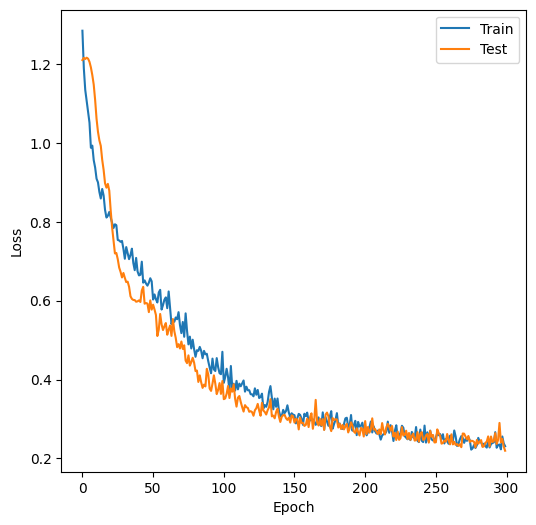

In [13]:
model.fit(images, labels, images_test, labels_test, # training data
          training_cycles=300, compute_accuracy=True, swa=True # training parameters
)

Now let's make a prediction on the image from a different experiment ( the data is from our paper in *Applied Physics Letters 115, 052902 (2019)* ). Notice that the raw output is a set of semantically segmented blobs (corresponding to different atoms) on a uniform background. We then simply find their centers of the mass, which correspond to the atomic centers (if a network was properly trained).

In [14]:
nn_output, coordinates = model.predict(expdata)

Batch 1/1
1 image was decoded in approximately 0.2326 seconds


In [15]:
coordinates[0].shape

(7455, 3)

Plot raw prediction:

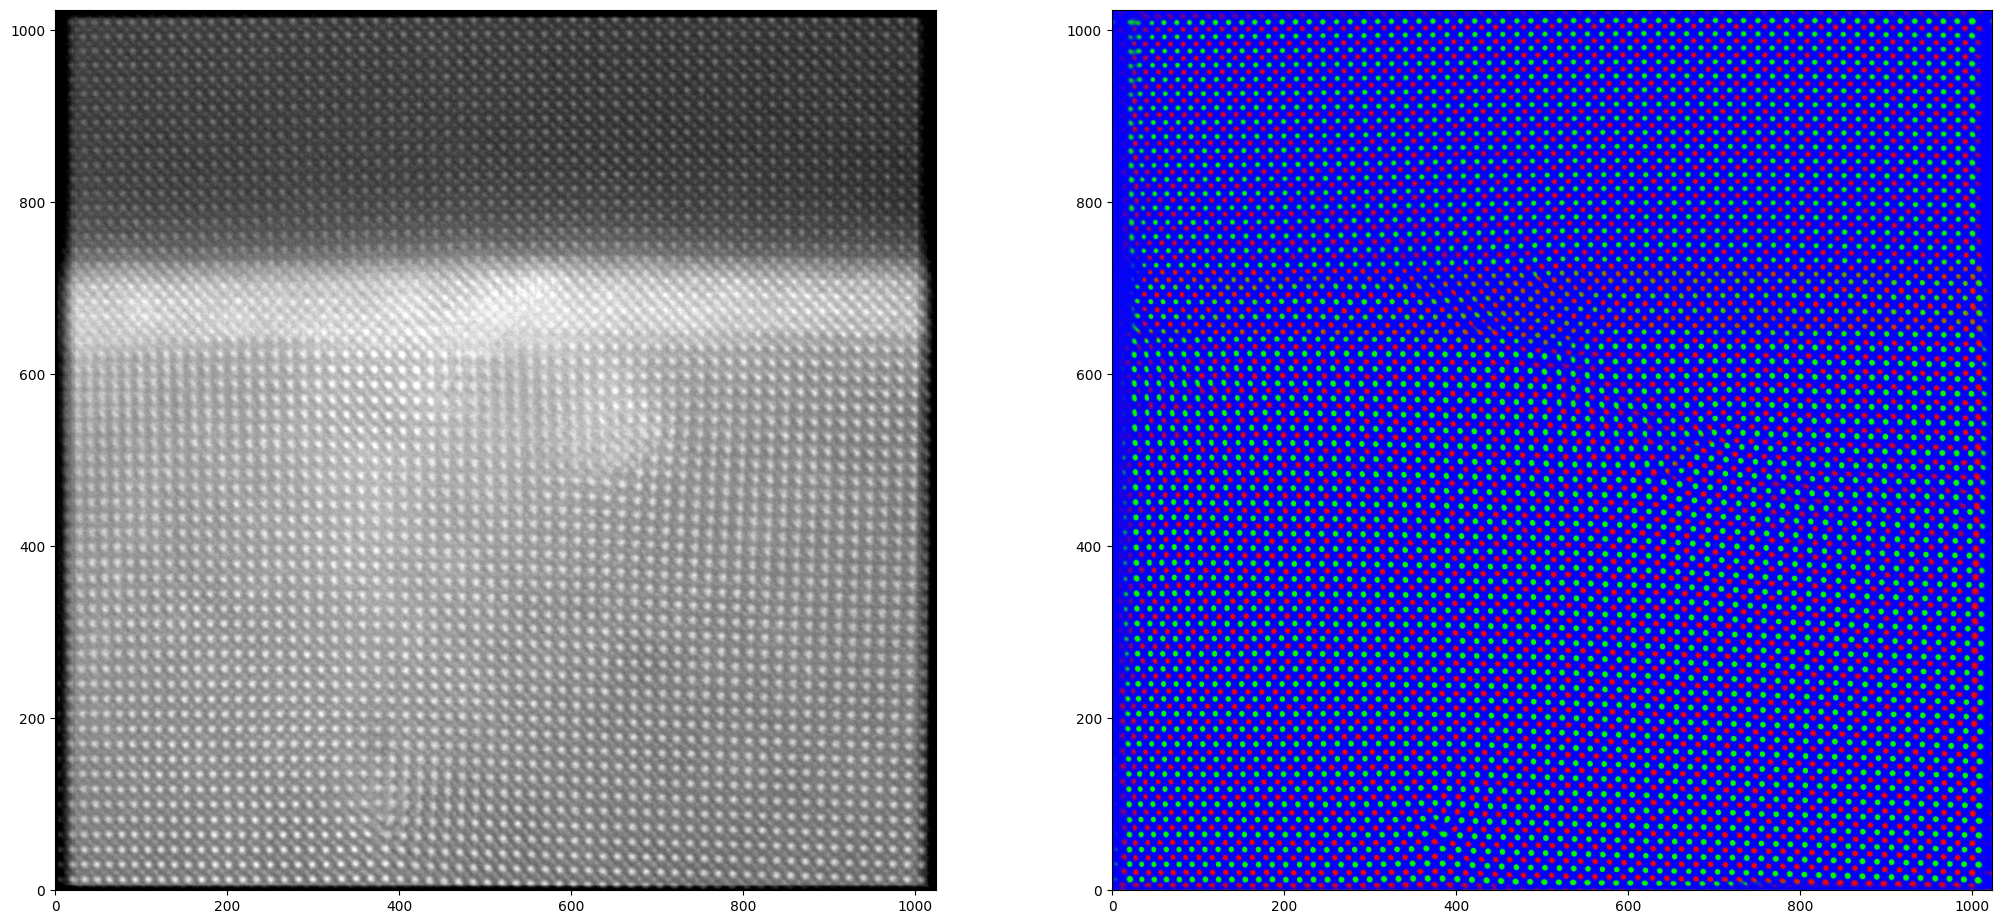

In [16]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 12))
ax1.imshow(expdata, cmap='gray', origin="lower")
ax2.imshow(nn_output.squeeze(), origin="lower")

Plot atomic coordinates:

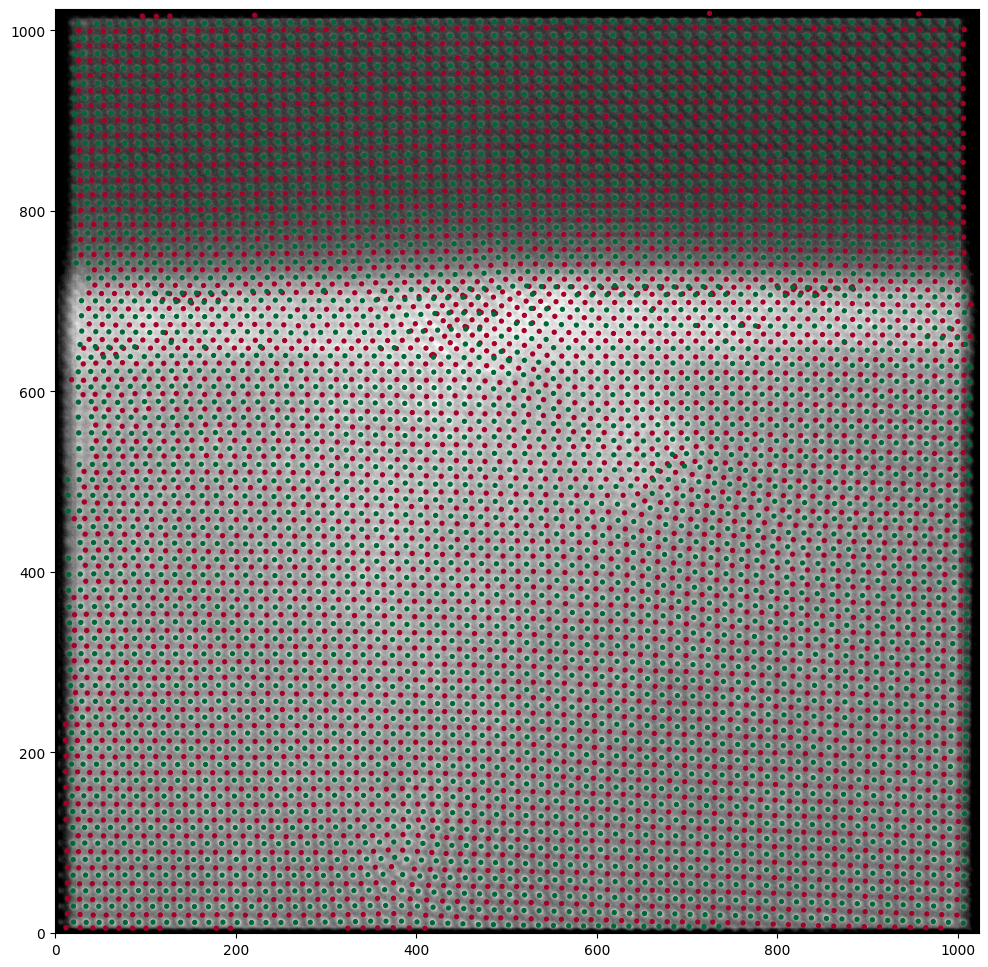

In [17]:
aoi.utils.plot_coord(expdata, coordinates[0], fsize=12)

Looks like our model performed quite well on the previously unseen data! There is no ground truth for the experimental data, so evaluating accuracy is somewhat tricky, but we can sometimes compare our results with the results of other methods.

Notice that here we analyzed image with resolution of 1024x1024 even though our network was trained only using 256x256 images. That's the beauty of fully convolutional neural networks (i.e. network without full-connected, dense layers) - it is not sensitive to the size of input image as long as it can be divided by $2^{n}$ where n is a number of max-pooling layers in the network. That said, there is always some optimal pixel-to-angstrom ratio (or, roughly, number of pixels per atom/defect) at which a network will generate the best results. It might be a good idea to determine such a ratio and (if possible) make adjustments to the resolution of experimental images.

Finally, please keep in mind that the model was trained onnly on a single image, so it may not be very robust or generalize well enough. However, the procedure for training on the larger and more diverse training set is exactly the same!

## Problem III.2.

III.4. Use the log-blob (Laplacian of Gaussian) to find atoms in the image

III.5. Plot intensity of each atom as a function of position, i.e. make image A(xi, yi), where xi, yi are coordinates of atoms

Note that with this approach, we can identify image patches and perform all the supervised and unsupervised analyses. However, before doing it let's experiment with atom finding using AtomAI neural network we have trained.

## Problem III.3.

Once we have all atomic coordinates and "cleaned" images we can perform various forms of analysis on local image descriptors. We start by get local descriptors, which are subimages centered on one of the sublattices:

In [18]:
imstack = aoi.stat.imlocal(nn_output, coordinates, window_size=32, coord_class=1)

In [19]:
# You can explore what's inside imstack object using the .*?
# imstack.*?

The imstack object encodes functions and methods in AtomAI. For our purposes, let's just create the arrays containign image patches and coordinates that they are taken from.

In [20]:
imstack.imgstack.shape, imstack.imgstack_com.shape

((3545, 32, 32, 3), (3545, 2))

III.6. Plot the atoms you have found with log-blob in blue, and with neural network in red. Which method worked better?

III.7. Use GMM to analyze the image patches,
- plot the class labels, and
- plot the labelled images (i.e. label at coordinates coming from imgstack_com)  

III.8. Run the PCA analysis. Plot the:
- scree plot
- PCA components
- PCA images (meaning PCA1, PCA2, etc. for location in coordinates)

III.9. Run similar analysis using variational autoencoder. Visualzie
- latent distribution
- latent representation
- latent images

**III.10 Congratulations!** As we conclude our final exam, I want to express my sincere admiration for the dedication and hard work you've all shown over the last 3.5 months. Starting from the basics of Python and machine learning, you've progressed remarkably, demonstrating your ability to address a variety of real-world problems, from decision analysis to image and spectrum analysis.

Your journey is impressive, reflecting not just your commitment to learning but also your potential to apply these skills in practical settings. The field of machine learning is vast and constantly evolving, and while what we've covered is just a glimpse, it's a strong foundation that I hope will be valuable in your current and future endeavors.

Remember, every expert in any field started as a beginner. The journey in machine learning is continuous, and there's always more to explore and learn. I encourage you to build upon the skills and principles you've learned here, and to keep pushing the boundaries of your knowledge and capabilities.

I am genuinely excited about the prospect of staying in touch. Collaborating on real-world challenges would be a wonderful opportunity to continue our learning journey together.

I will also greatly appreciate you feedback on the course - what can I do to make it better.

Once again, congratulations on completing this course. I'm eager to see where your paths lead in the fascinating world of machine learning and beyond. Please feel free to reach out anytime - I'm here to support and collaborate.

## Answers using AtomAI (for comparison)

This is the "official solution" using AtomAI functions. Once we have all atomic coordinates and "cleaned" images we can perform various forms of analysis on local image descriptors. In the remainder of this notebook, we are going to use AtomAI's *stat* module to get a stack of subimages around one of the atom types and perform different types of statistical analysis on them that would reveal the domain structure and the associated "principal" distortions in an unsupervised manner:

Start by get local descriptors, which are subimages centered on one of the sublattices. Note that the number of this subimages is smaller then numbe rof atoms (since we cannot use the atoms that are closer to edge then windowsize/2)

In [21]:
imstack = aoi.stat.imlocal(nn_output, coordinates, window_size=32, coord_class=1)

Compute PCA scree plot to estimate the number of components/sources for the multivariate analysis below:

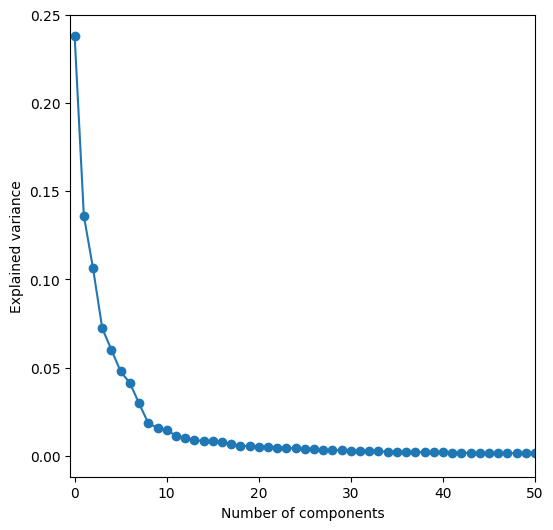

In [22]:
imstack.pca_scree_plot(plot_results=True);

Do PCA analysis and plot results:

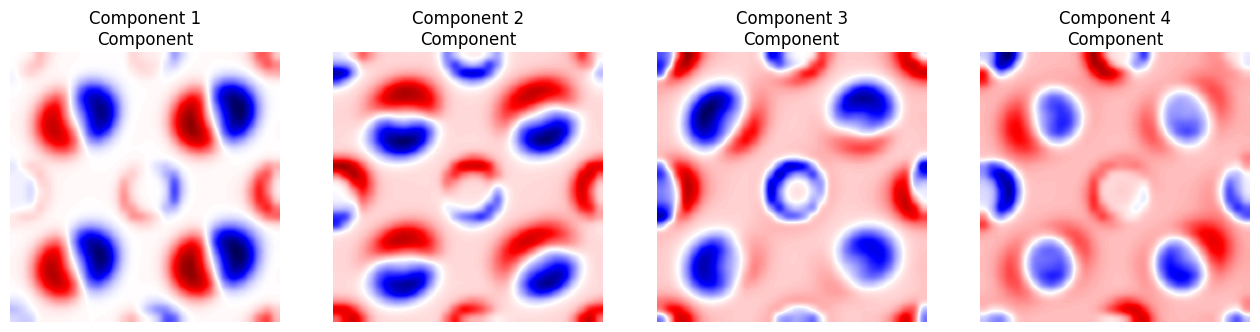

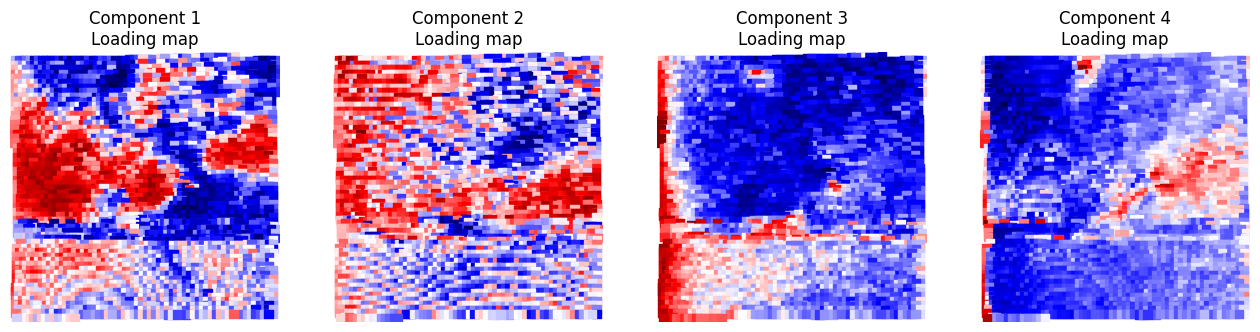

In [23]:
pca_results = imstack.imblock_pca(4, plot_results=True)

Do ICA analysis and plot results:

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


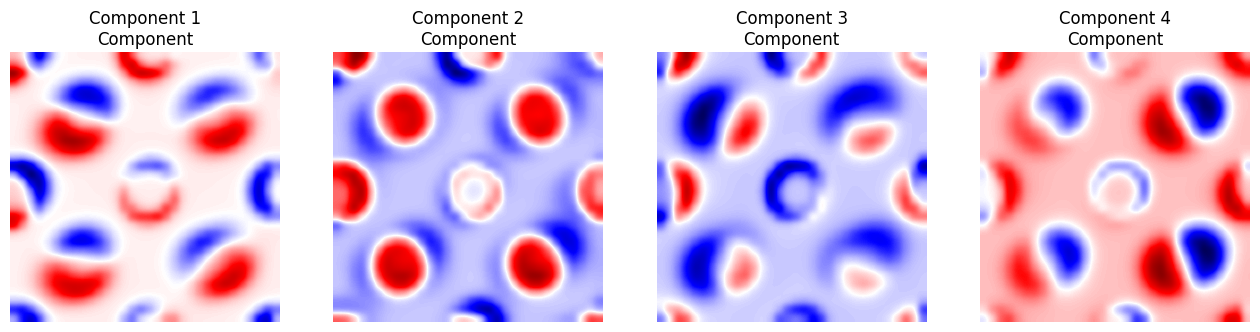

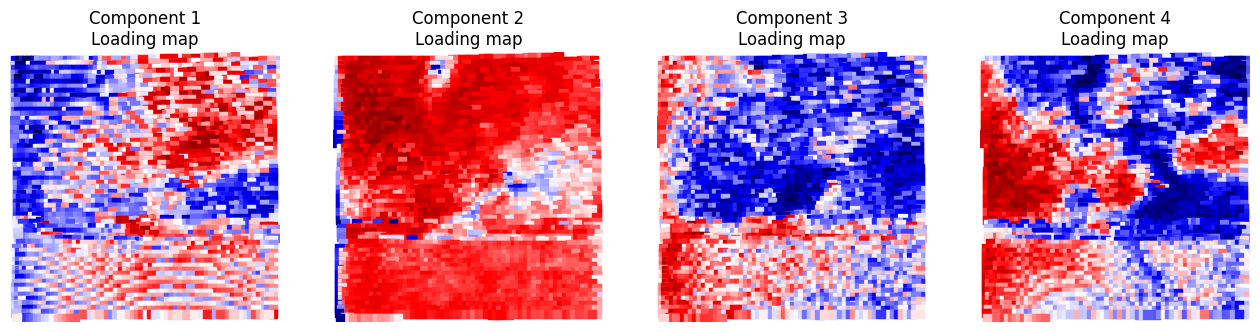

In [24]:
ica_results = imstack.imblock_ica(4, plot_results=True)

Do NMF analysis and plot results:

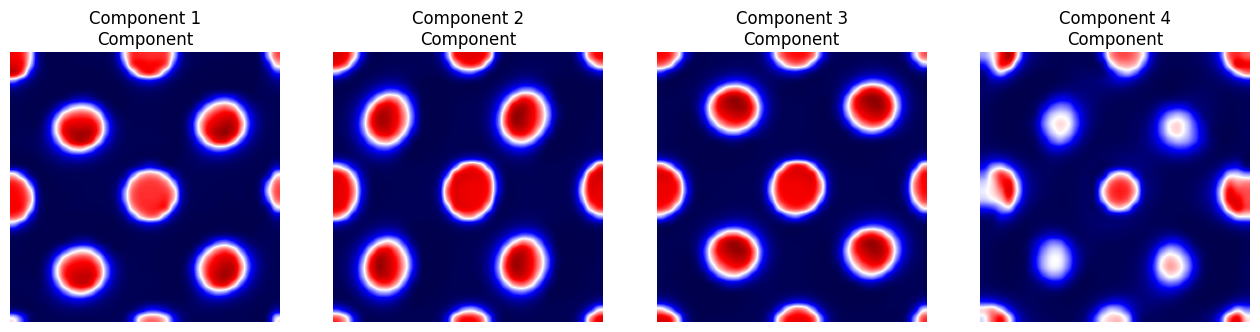

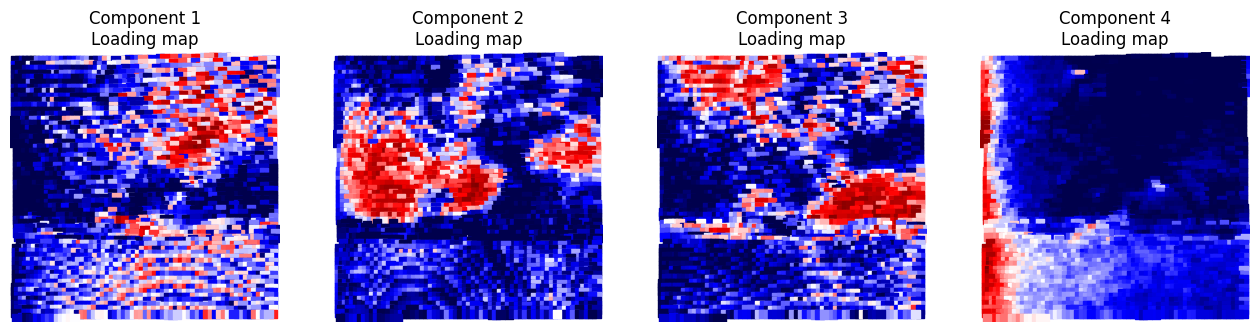

In [25]:
nmf_results = imstack.imblock_nmf(4, plot_results=True)